Imagine that you work for a company that is building a self-driving car. One of the challenges you face is that your car needs to quickly be able to determine what is happening around it.

For example, your self-driving car should be able to tell whether the sign at an intersection is a stop sign,
, or a yield sign. 

![a](.\image\a.png)
![b](.\image\b.png)

CNNs are powerful algorithms for processing images. In fact, these algorithms are currently the best algorithms we have for automated processing of images, and they are used by many different companies to do things like identifying the objects in an image.

Images contain data. Using Matplotlib, you can import an image into memory from a file and then display it using a plotting command, as shown here but the computer doesn't see the image. All it sees is an array of numbers. Color images are stored in 3-dimensional arrays. The first two dimensions correspond to the height and width of the image (the number of pixels). The last dimension corresponds to the red, green and blue colors present in each pixel.

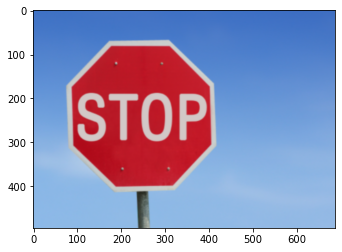

In [2]:
# image as data
import matplotlib.pyplot as plt
data =  plt.imread('./image/a.png')
plt.imshow(data)
plt.show()

In [2]:
data.shape

(495, 687, 4)

To examine the red, green and blue data in a particular pixel in the image, we index into both of the spatial dimensions of the image. For example, when we index on both of the spatial dimensions, we can choose a pixel that is inside the stop sign, by setting the row index to 100 and the column index to 150. This pixel has a high intensity in the red channel, so this is its color.

In [3]:
data[100,150]

array([0.78039217, 0.7921569 , 0.78431374, 1.        ], dtype=float32)

We can also change the image by changing the array data. For example, here we set the green and blue values of the pixels to zero. The result is an image that contains only the information in the red channel.

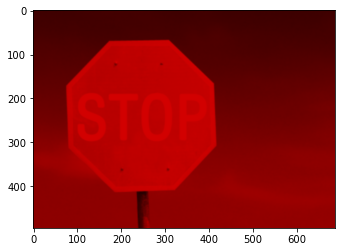

In [4]:
data[:,:,1] = 0
data[:,:,2] = 0
plt.imshow(data)
plt.show()

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

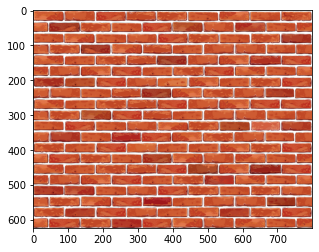

In [3]:
from skimage import transform

# Load the image
data = plt.imread('./image/bricks.png')

# Display the image
plt.imshow(data);

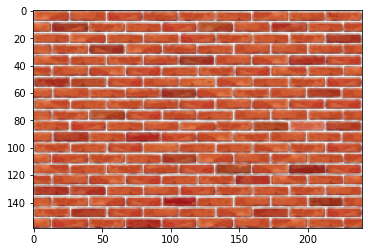

In [4]:
data = transform.resize(data, (159, 240))

# Display the image
plt.imshow(data);

In [5]:
data.shape

(159, 240, 4)

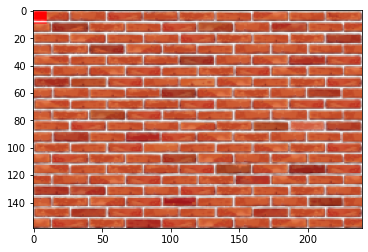

In [6]:
# Set the red channel in this part of the image to 1
data[:10, :10, 0] = 1

# Set the green channel in this part of the image to 0
data[:10, :10, 1] = 0

# Set the blue channel in this part of the image to 0
data[:10, :10, 2] = 0

# Visualize the result
plt.imshow(data);

Next, let's consider what to do in order to classify images.


We have images of three different classes: dresses, t-shirts and shoes. We'd like to build an algorithm that can distinguish between these classes. In machine learning, this is called a classification task.

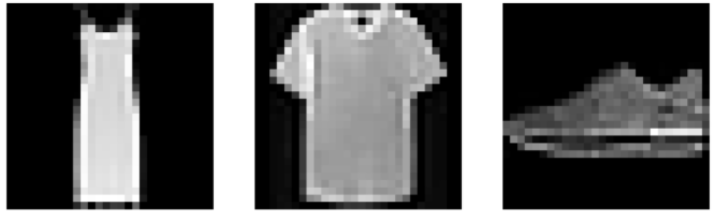

In the training phase, we present the algorithm with samples from these three classes, together with the class labels for each image.Over the course of training, the algorithm adjusts its parameters to learn the patterns in the data that distinguish between the three different classes of clothing.

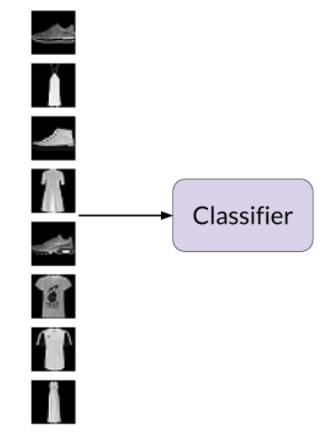

At the end of training, we would like to know how well our classifier does. To avoid an estimate that is overly optimistic because of overfitting, we evaluate it by testing it on a portion of the data that has been set aside in advance for this purpose.

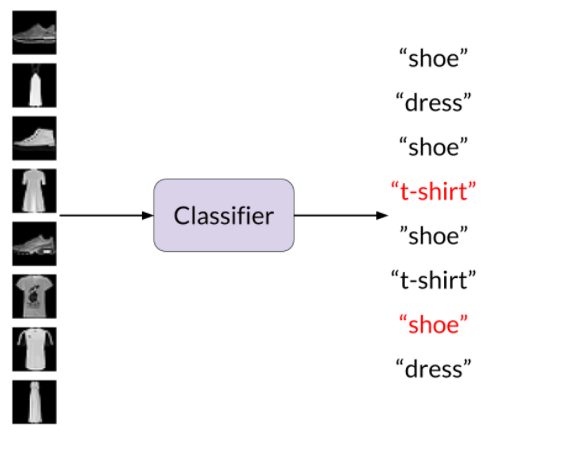

In this case, the classifier is able to correctly classify some of the images, but incorrectly classifies an image of a dress as a t-shirt, and an image of a t-shirt as a shoe.

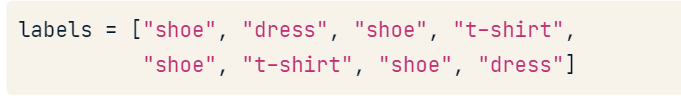

How do we represent data for classification? Consider the following series of labels. One mathematically convenient way of representing this data is called one-hot encoding.

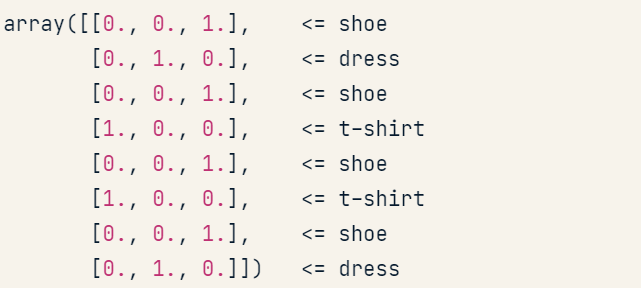

In this one-hot encoding array, each row represents one sample, and each column corresponds to one of the classes. In each row, all of the values are set to 0, except in the column corresponding to the class from which this image is taken. For example, here is a one-hot encoding of three images, a t-shirt, a dress, and a shoe.

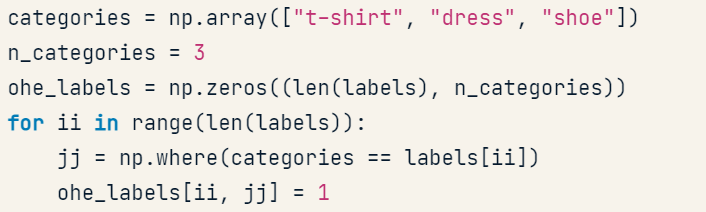

To generate a one-hot encoding of these samples we generate an array of categories. We initialize an array of zeros, and then we iterate over the list of labels. For each sample, we find the index into the categories array that corresponds to the current sample. We set the item in the corresponding row and column to 1 and continue on to the next label, until we have iterated over all labels.

For example, we can use the one-hot encoded array to determine how many predictions were correct. In this case, we predicted two samples incorrectly, out of 8 samples in the test set. The sum of the product of the two arrays is 6, which is the number of correct classifications.

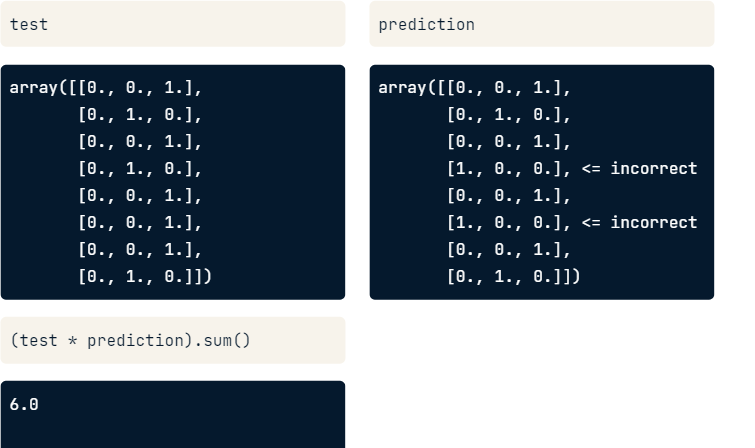


### Using one-hot encoding to represent images
Neural networks expect the labels of classes in a dataset to be organized in a one-hot encoded manner: each row in the array contains zeros in all columns, except the column corresponding to a unique label, which is set to 1.

The fashion dataset contains three categories:

- Shirts
- Dresses
- Shoes

In this exercise, you will create a one-hot encoding of a small sample of these labels.

In [7]:
labels = ['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress']

# The number of image categories
n_categories = 3
# The unique values of categories in the data
categories = np.array(['shirt', 'dress', 'shoe'])

# Initalize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variables
    jj = np.where(categories == labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii, jj] = 1

### Evaluating a classifier
To evaluate a classifier, we need to test it on images that were not used during training. This is called "cross-validation": a prediction of the class (e.g., t-shirt, dress or shoe) is made from each of the test images, and these predictions are compared with the true labels of these images.

In [8]:
test_labels = np.array([[0., 0., 1.], [0., 1., 0.], [0., 0., 1.], [0., 1., 0.], 
                        [0., 0., 1.], [0., 0., 1.], [0., 0., 1.], [0., 1., 0.]])

predictions = np.array([[0., 0., 1.], [0., 1., 0.], [0., 0., 1.], [1., 0., 0.], 
                        [0., 0., 1.], [1., 0., 0.], [0., 0., 1.], [0., 1., 0.]])

In [9]:
# Calculate the number of correct predictions
number_correct = (test_labels * predictions).sum()
print(number_correct)

# Calculate the proportion of correct predictions
proportion_correct = number_correct / predictions.shape[0]
print(proportion_correct)

6.0
0.75


# Keras for image classification

Let's use Keras to classify images. We'll start by using a fully connected network.

In [10]:
from tensorflow.keras.models import Sequential

# Initializes a sequential model
model = Sequential()


### Build a neural network
We will use the Keras library to create neural networks and to train these neural networks to classify images. These models will all be of the `Sequential` type, meaning that the outputs of one layer are provided as inputs only to the next layer.

The first layer is a set of densely connected units. We'll use 10 units here, but you could use another number - more units would increase the complexity of the network and its capacity to represent complex inputs. To facilitate learning, we're using a rectified linear unit or "relu" as the activation. This should be familiar from the deep learning course. The input_shape keyword argument tells us how many inputs each of these units should expect. In this case, it is 784: one connection from each one of the pixels in the image (28 by 28 is 784). We add another hidden layer, also with 10 units. Also with the "relu" activation. The output of our network is a fully connected layer with a unit for each class of inputs: 3 classes for the three types of clothing. The output unit uses a "softmax" activation to decide which of the three classes was presented.


In this exercise, you will create a neural network with `Dense` layers, meaning that each unit in each layer is connected to all of the units in the previous layer. For example, each unit in the first layer is connected to all of the pixels in the input images. The `Dense` layer object receives as arguments the number of units in that layer, and the activation function for the units. For the first layer in the network, it also receives an `input_shape` keyword argument.

In [12]:
from tensorflow.keras.layers import Dense

# First layer
model.add(Dense(10, activation='relu', input_shape=(784, ))) # check the train data shape (in this case the data is (50,28,8,1) and 28* 28 is 784)

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 7,993
Trainable params: 7,993
Non-trainable params: 0
_________________________________________________________________


### Compile a neural network
Next, we compile the model. We choose the optimizer to use (adam), and a loss function: categorical cross-entropy, which is appropriate for the classification task. Setting "metrics" to "accurac" tells the model to report accuracy as well.


Once you have constructed a model in Keras, the model needs to be compiled before you can fit it to data. This means that you need to specify the optimizer that will be used to fit the model and the loss function that will be used in optimization. Optionally, you can also specify a list of metrics that the model will keep track of. For example, if you want to know the classification accuracy, you will provide the list `['accuracy']` to the `metrics` keyword argument.

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Fitting a neural network model to clothing data
In this exercise, you will fit the fully connected neural network that you constructed in the previous exercise to image data. The training data is provided as two variables: `train_data` that contains the pixel data for 50 images of the three clothing classes and `train_labels`, which contains one-hot encoded representations of the labels for each one of these 50 images. Transform the data into the network's expected input and then fit the model on training data and training labels.

In [16]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_data = train_data[(train_labels >= 0) & (train_labels < 3)][0:50].reshape(-1, 28, 28, 1)
train_labels = train_labels[(train_labels >= 0) & (train_labels < 3)][0:50]
train_labels = pd.get_dummies(train_labels).to_numpy()

test_data = test_data[(test_labels >= 0) & (test_labels < 3)][0:10].reshape(-1, 28, 28, 1)
test_labels = test_labels[(test_labels >= 0) & (test_labels < 3)][0:10]
test_labels = pd.get_dummies(test_labels).to_numpy()

4423680/4422102 [==============================] - 0s 0us/step


The model expects samples to be rows in an array, and each column to represent a pixel in the image, so before we fit the model we need to convert the images into a two-dimensional table, using the "reshape" method. We fit the model to training data. During training, the network adjusts its weights through backpropagation and gradient descent. We might go through the data several times until the network can accurately classify the images. Here, the model will run for 20 epochs, meaning that it will go over all of the training data 20 times. How do we know that the algorithm has reached a good set of weights? We worry that the algorithm might overfit to the training data. That is, that the weights result in very small error on the training set, but would not generalize well to another dataset. To avoid overfitting, we set aside a set of validation images. At the end of every epoch of training, we'll test the model on this validation set. Here we use 20 percent of the images for validation, by setting "validation_split" to 0.2.

In [17]:
# Reshape the data to two-dimensional array
train_data = train_data.reshape((50, 784))

# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=20, verbose=False);

### Cross-validation for neural network evaluation
To evaluate the model, we use a separate test data-set. As in the train data, the images in the test data also need to be reshaped before they can be provided to the fully-connected network because the network expects one column per pixel in the input.

In [18]:
# Reshape test data
test_data = test_data.reshape((10, 784))

# Evaluate the model
model.evaluate(test_data, test_labels)

1/1 [==============================] - 0s 3ms/step - loss: 0.6687 - accuracy: 0.8000


[0.668671727180481, 0.800000011920929]